In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
d1=pd.read_csv('CCS-Database.csv')
d1

,Project \nName,Company,Plant \nName,Storage and/or \nCapture,Overall \nStatus,Plant \nStatus,Project \nPhase,Country\nLocation,State \nLocation,Specific \nSite Location,...,Power or \nCapture Unit,Combustion/\nSeparation,Capture \nTechnology,Amount of CO2 \nCaptured/Stored,Captured/Stored \nUnit,Project \nSummary,Project \nStart Date,Project \nCost,Currency,Project Information \nWebpage
0,Aalborg - Northern Jutland Power Station Project,Vattenfall,Northern Jutland Power Station,Capture and Storage,Hold,Existing,Plant in Operation,Denmark,NaN,Aalborg,...,Megawatt,Post-Combustion,Amines,4931.999836,Metric Tons Per Day,Vattenfall is planning to have a full-scale CC...,12/31/2013,2.000000e+09,Danish Krone,http://www.zeroco2.no/projects/nordjylland-pow...
1,AES Shady Point,AES Corporation,Shady Point Power Plant,Capture,Terminated,Existing,Plant in Operation,United States,Oklahoma,"Panama, Oklahoma",...,Megawatt,Post-Combustion,Ethanol-Amino Solvent,200.000000,Metric Tons Per Day,The CO2 is scrubbed from the flue gas stream v...,01/01/1991,NaN,US Dollar,https://www.globalccsinstitute.com/projects/ae...
2,AES Warrior Run,AES Corporation,Warrior Run Power Plant,Capture,Active,Existing,Plant in Operation,United States,Maryland,"Cumberland, Maryland",...,Megawatt,Post-Combustion,Ethanol-Amino Solvent,96.000000,% Reduction,This plant captures around 96% of its CO2 emis...,02/01/2000,NaN,US Dollar,http://energywv.org/assets/files/Energy-Summit...
3,Air Products and Chemicals Inc. CCS Project,Air Products and Chemicals,Valero Port Arthur Refinery's Methane Steam Re...,Capture and Storage,Completed,Existing,Capture Ongoing,United States,Texas,Port Arthur,...,NaN,Industrial,Vacuum Swing Absorption,2739.999909,Metric Tons Per Day,"DOE project was completed on September 30, 201...",11/16/2009,4.306488e+08,US Dollar,http://www.netl.doe.gov/research/coal/project-...
4,Alberta Carbon Trunk Line,Enhance Energy,North West Upgrading Inc. and Agrium Inc,Capture and Storage,Active,Existing,Developing Infrastructure,Canada,Alberta,South-Central Alberta,...,NaN,NaN,NaN,40003.998671,Metric Tons Per Day,The Alberta Carbon Trunk Line (ACTL) is capabl...,01/01/2012,6.000000e+08,US Dollar,https://canada.constructconnect.com/dcn/news/R...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Yanchang Integrated Carbon Capture and Storage...,Shaanxi Yanchang Petroleum Group,Yanchang ICCS Demonstration Project,Capture and Storage,Active,Existing,Capture Ongoing,China,Shaanxi Province,"Shaanxi Province, China",...,Metric Tons Per Day,Pre-Combustion,Cold Methanol (Rectisol),136.999995,Metric Tons Per Day,"The second phase would capture 360,000 metric ...",01/01/2017,NaN,US Dollar,https://www.globalccsinstitute.com/projects/ya...
301,Yates Oil Field EOR Operations,Kinder Morgan,Kinder Morgan,Storage,Active,Existing,Injection Ongoing,United States,Texas,Pecos County west of Iraan Texas,...,NaN,NaN,NaN,20800.000000,Barrels Per Day,Kinder Morgan delivers approximately 1.3 billi...,01/01/2006,NaN,US Dollar,http://www.kindermorgan.com/business/co2/yates...
302,Yulin Coal to Chemicals CCS,Shenhua Group,New Coal-to-Chemical Plant,Capture and Storage,Potential,Planned,Planning,China,Shanxi Province,Yulin City,...,NaN,Industrial,Solvents,5479.999818,Metric Tons Per Day,Shenhua and Dow would likely form a 50:50 join...,01/01/2017,1.210000e+11,Chinese Yuan,https://sequestration.mit.edu/tools/projects/Y...
303,ZENG Worsham-Steed,CO2 Global,ZENG Worsham-Steed,Capture and Storage,Potential,Planned,Plant Design,United States,Texas,Worsham-Steed,...,Megawatt,Oxy-Combustion,NaN,870.000000,Metric Tons Per Day,"Technology development, process design, and en...",01/01/2007,NaN,US Dollar,https://sequestration.mit.edu/tools/projects/w...


In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Project 
Name                   305 non-null    object 
 1   Company                         305 non-null    object 
 2   Plant 
Name                     277 non-null    object 
 3   Storage and/or 
Capture         305 non-null    object 
 4   Overall 
Status                 305 non-null    object 
 5   Plant 
Status                   241 non-null    object 
 6   Project 
Phase                  257 non-null    object 
 7   Country
Location                304 non-null    object 
 8   State 
Location                 222 non-null    object 
 9   Specific 
Site Location         301 non-null    object 
 10  Plant Size or 
Capture Amount   182 non-null    float64
 11  Power or 
Capture Unit          183 non-null    object 
 12  Combustion/
Separation          219 

In [4]:
d1.shape

(305, 21)

In [5]:
d1.describe()

,Plant Size or \nCapture Amount,Amount of CO2 \nCaptured/Stored,Project \nCost
count,1.820000e+02,2.350000e+02,2.170000e+02
mean,2.786479e+05,2.918801e+05,2.010555e+09
std,3.706014e+06,2.703049e+06,9.607955e+09
min,0.000000e+00,0.000000e+00,2.051693e+04
25%,1.641900e+02,9.900000e+01,1.076114e+07
50%,4.500000e+02,2.192000e+03,7.900000e+07
75%,8.900000e+02,7.124000e+03,1.300000e+09
max,5.000000e+07,4.000000e+07,1.210000e+11


In [6]:
d_1=d1.dropna()#removed rows which had missing values NaN
d_1

,Project \nName,Company,Plant \nName,Storage and/or \nCapture,Overall \nStatus,Plant \nStatus,Project \nPhase,Country\nLocation,State \nLocation,Specific \nSite Location,...,Power or \nCapture Unit,Combustion/\nSeparation,Capture \nTechnology,Amount of CO2 \nCaptured/Stored,Captured/Stored \nUnit,Project \nSummary,Project \nStart Date,Project \nCost,Currency,Project Information \nWebpage
26,Boundary Dam Integrated CCS Project,SaskPower,Boundary Dam Power Station,Capture and Storage,Active,Existing,Plant in Operation,Canada,Saskatchewan,Estevan,...,Megawatt,Post-Combustion,Amines,2739.999909,Metric Tons Per Day,The captured CO2 is sold and transported by pi...,01/01/2014,1.300000e+09,Canadian Dollar,https://www.saskpower.com/our-power-future/inf...
27,Bow City Power Project,"Bow City Power, Ltd.",Bow City Power Plant,Capture and Storage,Hold,Planned,Planning,Canada,Alberta,Bow City,...,Megawatt,Post-Combustion,Amines,2739.999909,Metric Tons Per Day,Supercritical PC plant in which removed CO2 wi...,01/01/2011,2.900000e+09,Canadian Dollar,https://open.alberta.ca/publications/environme...
56,CS Energy Callide Oxyfuels Project,CS Energy,Callide A Power Station,Capture and Storage,Completed,Existing,Injection Complete,Australia,Queensland,Town of Biloela in the Banana Shire,...,Megawatt,Post-Combustion,Oxy-Fuel Combustion,82.199997,Metric Tons Per Day,The project retrofitted a 30-MW unit at CS Ene...,03/01/2006,2.450000e+08,Australian Dollar,http://callideoxyfuel.com/
57,CSIRO Transportable Capture Unit Loy Yang (Vic...,CSIRO - Australian Commonwealth Scientific and...,Loy Yang Power Plant,Capture,Active,Existing,Plant in Operation,Australia,Victoria,Loy Yang,...,Megawatt,Post-Combustion,Solvents,2.740000,Metric Tons Per Day,Australia's CSIRO has a mobile post-combustion...,07/01/2008,5.000000e+06,Australian Dollar,http://www.zeroco2.no/projects/loy-yang-pcc-pr...
59,CSIRO Transportable Capture Unit Tarong (Queen...,CSIRO - Australian Commonwealth Scientific and...,Tarong Power Station,Capture,Completed,Existing,Plant in Operation,Australia,Queensland,Nanango,...,Megawatt,Post-Combustion,Amines,4.110000,Metric Tons Per Day,Amine-based post-combustion capture pilot plan...,06/01/2009,5.000000e+06,Australian Dollar,http://www.carboncapturejournal.com/news/taron...
62,DKRW Energy LLC,DKRW Energy LLC,Medicine Bow CTL,Capture,Hold,Planned,Permitting,United States,Wyoming,Carbon County,...,Barrels Per Day,Pre-Combustion,Chilled Ammonia,20000.000000,Barrels Per Day,"Plan was to produce 20,000 - 22,000 barrels pe...",01/01/2014,2.000000e+09,US Dollar,http://www.zeroco2.no/projects/medicine-bow-ctl
63,Don Valley CCS Power Project,Sargas,Don Valley Power Plant,Capture and Storage,Potential,In Development,Planning,United Kingdom,South Yorkshire,Yorkshire,...,Megawatt,Pre-Combustion,Cold Methanol (Rectisol),13699.999545,Metric Tons Per Day,The project has completed a FEED study and rec...,02/01/2009,5.000000e+09,Euros,https://sequestration.mit.edu/tools/projects/d...
70,"E.ON Pilot Plant in Heyden, Germany",E.ON,Heyden Power Plant,Capture,Completed,Existing,Capture Complete,Germany,North Rhine - Westphalia,Minden,...,Megawatt,Post-Combustion,Amines,90.000000,% Reduction,The project plans to improve the efficiency of...,01/01/2010,1.000000e+07,Euros,http://www.cansolv.com/rtecontent/document/CO2...
71,E.ON Ruhrgas Killingholme IGCC,E.ON,Killingholme Station,Capture and Storage,Terminated,Planned,Plant Design,United Kingdom,Lincolnshire,North Killingholme,...,Megawatt,Pre-Combustion,Solvents,6849.999772,Metric Tons Per Day,Large-scale IGCC Plant with CCS. Capture up to...,01/01/2019,1.000000e+09,British Pound,http://sequestration.mit.edu/tools/projects/ki...
82,Fairview ZeroCarbon Project,Australian Government,Injune Power Plant,Capture and Storage,Terminated,Planned,Plant Design,Australia,Queensland,Injune,...,Megawatt,Post-Combustion,Amines,273.999991,Metric Tons Per Day,Fairview ZeroCarbon project (ZCP) will receive...,01/01/2009,4.450000e+08,

In [7]:
d_1['Currency'].unique()

array(['Canadian Dollar', 'Australian Dollar', 'US Dollar', 'Euros',
       'British Pound', 'Norwegian Kroner'], dtype=object)

In [8]:
exchange_rates = {
    'Canadian Dollar': 0.75,
    'Australian Dollar': 0.67,
    'US Dollar': 1.0,
    'Euros': 1.1,
    'British Pound': 1.28,
    'Norwegian Kroner': 0.093}
d_1.loc[:,'exchange_rate'] = d_1['Currency'].map(exchange_rates)#created a coloumb contaning the exchange rate
d_1.loc[:,'cost_usd_per_tonne'] = d_1['Project \nCost'] * d_1['exchange_rate']#created coloumb having the prices in USD
d_1_clean = d_1.dropna(subset=['exchange_rate', 'cost_usd_per_tonne'])
nd_1=d_1.copy()

C:\Users\Krihna Yadav\AppData\Local\Temp\ipykernel_16424\883999296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_1.loc[:,'exchange_rate'] = d_1['Currency'].map(exchange_rates)#created a coloumb contaning the exchange rate
C:\Users\Krihna Yadav\AppData\Local\Temp\ipykernel_16424\883999296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_1.loc[:,'cost_usd_per_tonne'] = d_1['Project \nCost'] * d_1['exchange_rate']#created coloumb having the prices in USD


In [9]:
nd_1

,Project \nName,Company,Plant \nName,Storage and/or \nCapture,Overall \nStatus,Plant \nStatus,Project \nPhase,Country\nLocation,State \nLocation,Specific \nSite Location,...,Capture \nTechnology,Amount of CO2 \nCaptured/Stored,Captured/Stored \nUnit,Project \nSummary,Project \nStart Date,Project \nCost,Currency,Project Information \nWebpage,exchange_rate,cost_usd_per_tonne
26,Boundary Dam Integrated CCS Project,SaskPower,Boundary Dam Power Station,Capture and Storage,Active,Existing,Plant in Operation,Canada,Saskatchewan,Estevan,...,Amines,2739.999909,Metric Tons Per Day,The captured CO2 is sold and transported by pi...,01/01/2014,1.300000e+09,Canadian Dollar,https://www.saskpower.com/our-power-future/inf...,0.750,9.750000e+08
27,Bow City Power Project,"Bow City Power, Ltd.",Bow City Power Plant,Capture and Storage,Hold,Planned,Planning,Canada,Alberta,Bow City,...,Amines,2739.999909,Metric Tons Per Day,Supercritical PC plant in which removed CO2 wi...,01/01/2011,2.900000e+09,Canadian Dollar,https://open.alberta.ca/publications/environme...,0.750,2.175000e+09
56,CS Energy Callide Oxyfuels Project,CS Energy,Callide A Power Station,Capture and Storage,Completed,Existing,Injection Complete,Australia,Queensland,Town of Biloela in the Banana Shire,...,Oxy-Fuel Combustion,82.199997,Metric Tons Per Day,The project retrofitted a 30-MW unit at CS Ene...,03/01/2006,2.450000e+08,Australian Dollar,http://callideoxyfuel.com/,0.670,1.641500e+08
57,CSIRO Transportable Capture Unit Loy Yang (Vic...,CSIRO - Australian Commonwealth Scientific and...,Loy Yang Power Plant,Capture,Active,Existing,Plant in Operation,Australia,Victoria,Loy Yang,...,Solvents,2.740000,Metric Tons Per Day,Australia's CSIRO has a mobile post-combustion...,07/01/2008,5.000000e+06,Australian Dollar,http://www.zeroco2.no/projects/loy-yang-pcc-pr...,0.670,3.350000e+06
59,CSIRO Transportable Capture Unit Tarong (Queen...,CSIRO - Australian Commonwealth Scientific and...,Tarong Power Station,Capture,Completed,Existing,Plant in Operation,Australia,Queensland,Nanango,...,Amines,4.110000,Metric Tons Per Day,Amine-based post-combustion capture pilot plan...,06/01/2009,5.000000e+06,Australian Dollar,http://www.carboncapturejournal.com/news/taron...,0.670,3.350000e+06
62,DKRW Energy LLC,DKRW Energy LLC,Medicine Bow CTL,Capture,Hold,Planned,Permitting,United States,Wyoming,Carbon County,...,Chilled Ammonia,20000.000000,Barrels Per Day,"Plan was to produce 20,000 - 22,000 barrels pe...",01/01/2014,2.000000e+09,US Dollar,http://www.zeroco2.no/projects/medicine-bow-ctl,1.000,2.000000e+09
63,Don Valley CCS Power Project,Sargas,Don Valley Power Plant,Capture and Storage,Potential,In Development,Planning,United Kingdom,South Yorkshire,Yorkshire,...,Cold Methanol (Rectisol),13699.999545,Metric Tons Per Day,The project has completed a FEED study and rec...,02/01/2009,5.000000e+09,Euros,https://sequestration.mit.edu/tools/projects/d...,1.100,5.500000e+09
70,"E.ON Pilot Plant in Heyden, Germany",E.ON,Heyden Power Plant,Capture,Completed,Existing,Capture Complete,Germany,North Rhine - Westphalia,Minden,...,Amines,90.000000,% Reduction,The project plans to improve the efficiency of...,01/01/2010,1.000000e+07,Euros,http://www.cansolv.com/rtecontent/document/CO2...,1.100,1.100000e+07
71,E.ON Ruhrgas Killingholme IGCC,E.ON,Killingholme Station,Capture and Storage,Terminated,Planned,Plant Design,United Kingdom,Lincolnshire,North Killingholme,...,Solvents,6849.999772,Metric Tons Per Day,Large-scale IGCC Plant with CCS. Capture up to...,01/01/2019,1.000000e+09,British Pound,http://sequestration.mit.edu/tools/projects/ki...,1.280,1.280000e+09
82,Fairview ZeroCarbon Project,Australian Government,Injune Power Plant,Capture and Storage,Terminated,Planned,Plant Design,Australia,Queensland,Injune,...,Amines,273.999991,Metric Tons Per Day,Fairview ZeroCarbon project (ZCP) will receive...,01/01/2009,4.450000e+08,Australian Dollar,http://globalenergyobservatory.org/geoid/40151,0.670,2.981500e+08


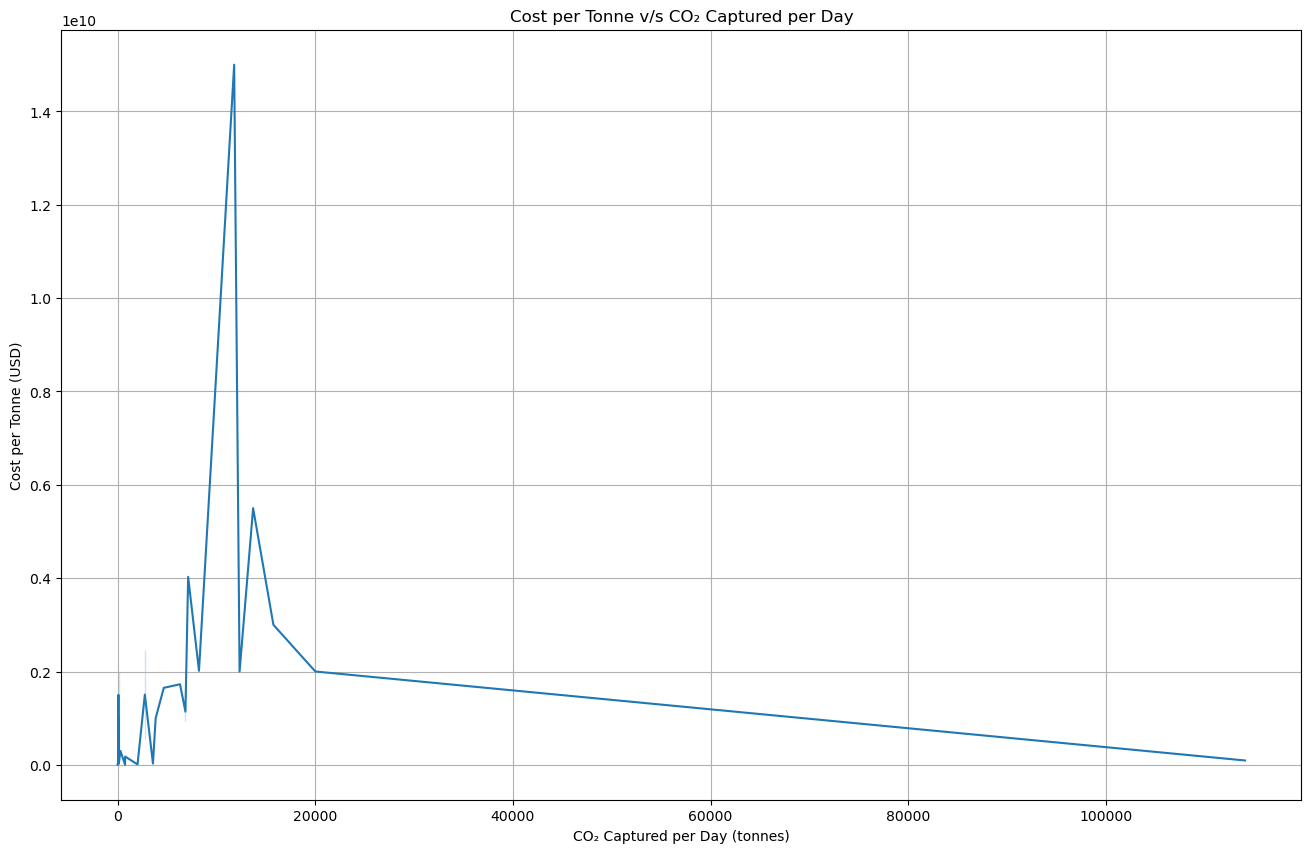

In [11]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=nd_1, x='Amount of CO2 \nCaptured/Stored', y='cost_usd_per_tonne')
plt.title('Cost per Tonne v/s CO₂ Captured per Day')
plt.xlabel('CO₂ Captured per Day (tonnes)')
plt.ylabel('Cost per Tonne (USD)')
plt.grid(True)

Text(0, 0.5, 'Cost per Tonne (USD)')

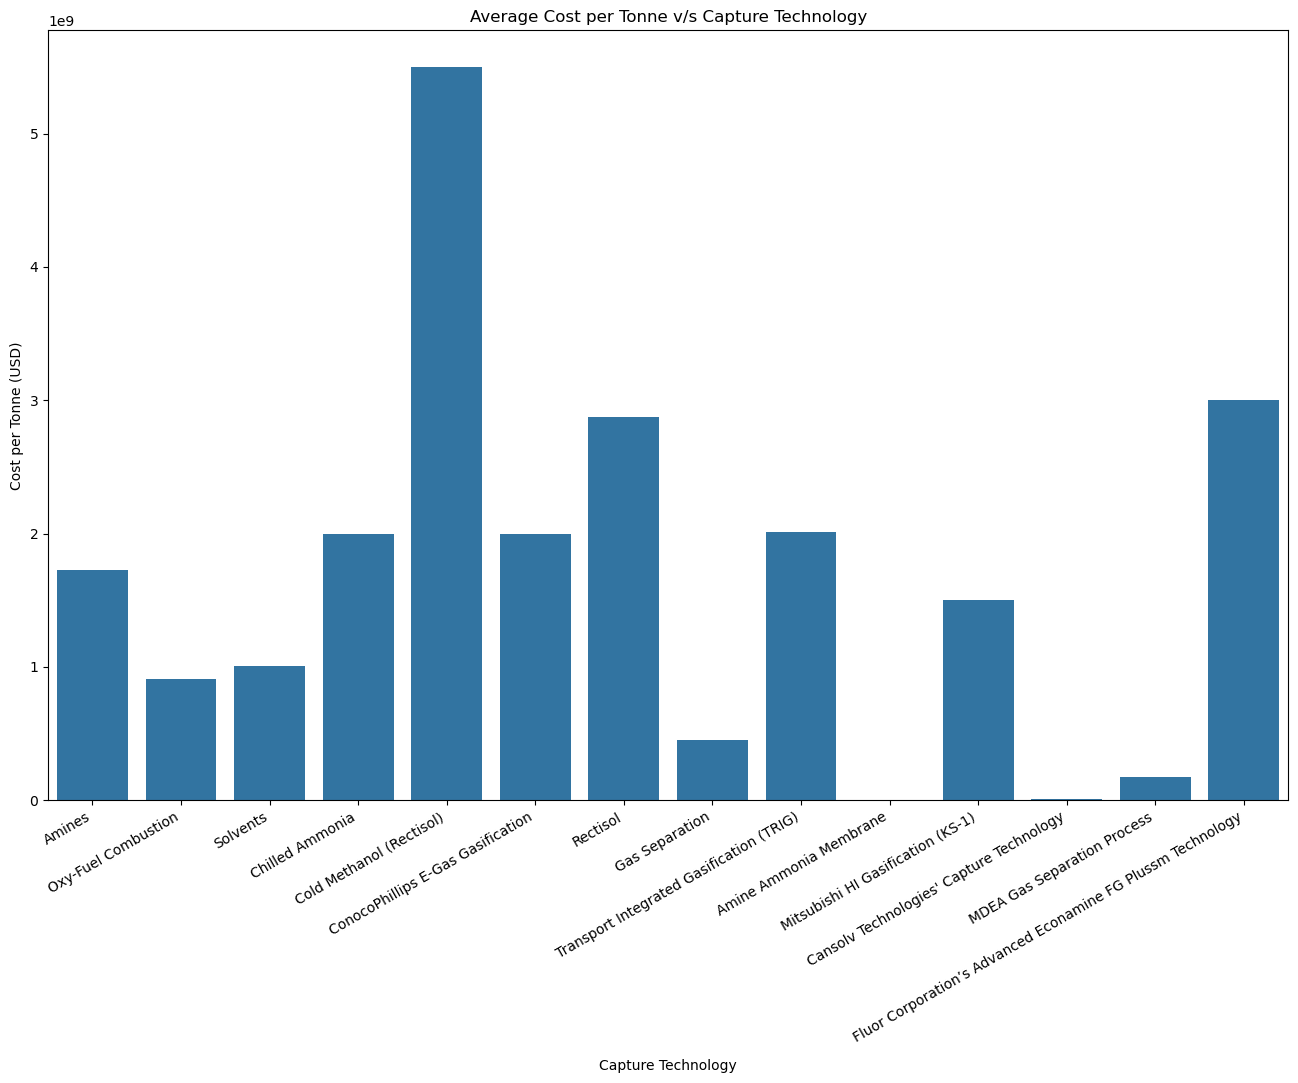

In [12]:
plt.figure(figsize=(16, 10))
sns.barplot(data=nd_1, x='Capture \nTechnology', y='cost_usd_per_tonne',errorbar=None)
plt.xticks(rotation=30,ha='right')
plt.title('Average Cost per Tonne v/s Capture Technology')
plt.xlabel('Capture Technology',labelpad=10)
plt.ylabel('Cost per Tonne (USD)')

In [13]:
nd_1.groupby('Capture \nTechnology').count()

,Project \nName,Company,Plant \nName,Storage and/or \nCapture,Overall \nStatus,Plant \nStatus,Project \nPhase,Country\nLocation,State \nLocation,Specific \nSite Location,...,Combustion/\nSeparation,Amount of CO2 \nCaptured/Stored,Captured/Stored \nUnit,Project \nSummary,Project \nStart Date,Project \nCost,Currency,Project Information \nWebpage,exchange_rate,cost_usd_per_tonne
Capture Technology,,,,,,,,,,,,,,,,,,,,,
Amine Ammonia Membrane,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Amines,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Cansolv Technologies' Capture Technology,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Chilled Ammonia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Cold Methanol (Rectisol),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ConocoPhillips E-Gas Gasification,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Fluor Corporation’s Advanced Econamine FG Plussm Technology,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Gas Separation,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
MDEA Gas Separation Process,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


C:\Users\Krihna Yadav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Capture Technologies v/s Number of projects')

<Figure size 1600x1000 with 0 Axes>

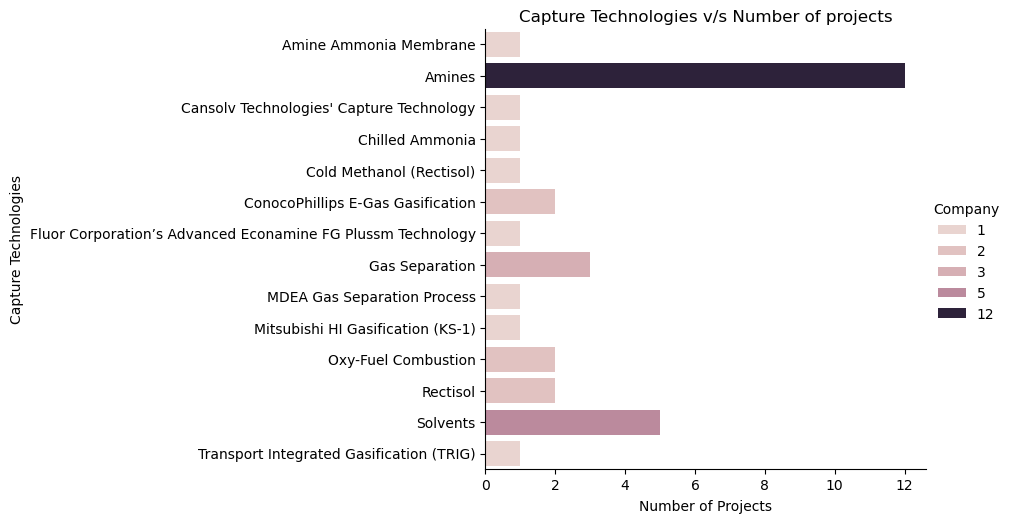

In [14]:
plt.figure(figsize=(16,10))
sns.catplot(kind='bar',data=nd_1.groupby('Capture \nTechnology').count(),x='Project \nName',y='Capture \nTechnology',hue='Company')
plt.xlabel('Number of Projects',labelpad=5)
plt.ylabel('Capture Technologies')
plt.title('Capture Technologies v/s Number of projects',pad=5)

In [18]:
nd_1.columns

Index(['Project \nName', 'Company', 'Plant \nName', 'Storage and/or \nCapture',
       'Overall \nStatus', 'Plant \nStatus', 'Project \nPhase',
       'Country\nLocation', 'State \nLocation', 'Specific \nSite Location',
       'Plant Size or \nCapture Amount', 'Power or \nCapture Unit',
       'Combustion/\nSeparation', 'Capture \nTechnology',
       'Amount of CO2 \nCaptured/Stored', 'Captured/Stored \nUnit',
       'Project \nSummary', 'Project \nStart Date', 'Project \nCost',
       'Currency', 'Project Information \nWebpage', 'exchange_rate',
       'cost_usd_per_tonne'],
      dtype='object')

In [44]:
X=nd_1[['Project \nCost',
    'Amount of CO2 \nCaptured/Stored',
    'Capture \nTechnology',
    'Combustion/\nSeparation',
    'Country\nLocation',
    'Storage and/or \nCapture']].values
y=nd_1['cost_usd_per_tonne']

In [45]:
X

array([[1300000000.0, 2739.99990895391, 'Amines', 'Post-Combustion',
        'Canada', 'Capture and Storage'],
       [2900000000.0, 2739.99990895391, 'Amines', 'Post-Combustion',
        'Canada', 'Capture and Storage'],
       [245000000.0, 82.1999972686172, 'Oxy-Fuel Combustion',
        'Post-Combustion', 'Australia', 'Capture and Storage'],
       [5000000.0, 2.73999990895391, 'Solvents', 'Post-Combustion',
        'Australia', 'Capture'],
       [5000000.0, 4.10999986343086, 'Amines', 'Post-Combustion',
        'Australia', 'Capture'],
       [2000000000.0, 20000.0, 'Chilled Ammonia', 'Pre-Combustion',
        'United States', 'Capture'],
       [5000000000.0, 13699.9995447695, 'Cold Methanol (Rectisol)',
        'Pre-Combustion', 'United Kingdom', 'Capture and Storage'],
       [10000000.0, 90.0, 'Amines', 'Post-Combustion', 'Germany',
        'Capture'],
       [1000000000.0, 6849.99977238476, 'Solvents', 'Pre-Combustion',
        'United Kingdom', 'Capture and Storage'],
     

In [21]:
y

26     9.750000e+08
27     2.175000e+09
56     1.641500e+08
57     3.350000e+06
59     3.350000e+06
62     2.000000e+09
63     5.500000e+09
70     1.100000e+07
71     1.280000e+09
82     2.981500e+08
97     2.000000e+09
102    2.854200e+06
103    9.300000e+08
106    2.233780e+08
112    4.028137e+09
137    1.210000e+09
138    2.014813e+09
153    1.500000e+10
156    2.000000e+09
172    2.747000e+06
182    1.500000e+09
191    1.230975e+08
206    2.750000e+09
216    1.012500e+09
222    1.075200e+07
225    9.900000e+06
234    2.688000e+07
239    9.368924e+07
262    1.726628e+09
272    1.777564e+08
278    3.000000e+09
285    2.760000e+07
287    1.650000e+09
290    1.000000e+09
Name: cost_usd_per_tonne, dtype: float64

In [58]:
#converting the data
techno = nd_1[[
    'Capture \nTechnology',
    'Combustion/\nSeparation',
    'Country\nLocation',
    'Storage and/or \nCapture'
]]

X = pd.concat([techno, captured], axis=1)
X = pd.get_dummies(X, columns=[
    'Capture \nTechnology',
    'Combustion/\nSeparation',
    'Country\nLocation',
    'Storage and/or \nCapture'
], drop_first=True)
X

,Amount of CO2 \nCaptured/Stored,Project \nCost,Capture \nTechnology_Amines,Capture \nTechnology_Cansolv Technologies' Capture Technology,Capture \nTechnology_Chilled Ammonia,Capture \nTechnology_Cold Methanol (Rectisol),Capture \nTechnology_ConocoPhillips E-Gas Gasification,Capture \nTechnology_Fluor Corporation’s Advanced Econamine FG Plussm Technology,Capture \nTechnology_Gas Separation,Capture \nTechnology_MDEA Gas Separation Process,...,Country\nLocation_Canada,Country\nLocation_England,Country\nLocation_Germany,Country\nLocation_Italy,Country\nLocation_Norway,Country\nLocation_Poland,Country\nLocation_United Arab Emirates,Country\nLocation_United Kingdom,Country\nLocation_United States,Storage and/or \nCapture_Capture and Storage
26,2739.999909,1.300000e+09,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
27,2739.999909,2.900000e+09,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
56,82.199997,2.450000e+08,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
57,2.740000,5.000000e+06,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59,4.110000,5.000000e+06,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62,20000.000000,2.000000e+09,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
63,13699.999545,5.000000e+09,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
70,90.000000,1.000000e+07,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
71,6849.999772,1.000000e+09,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
82,273.999991,4.450000e+08,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [59]:
#train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [60]:
#algorithm
l_reg=linear_model.LinearRegression()

In [61]:
#model
model=l_reg.fit(X_train,y_train)
model

LinearRegression()

In [62]:
#prediction
prediction=model.predict(X_test)

In [63]:
print("Predictions:", prediction)
print("R^2 value: ", l_reg.score(X,y))

Predictions: [2.18072343e+09 1.08088405e+09 1.50115896e+07 1.26954878e+09
 2.84623391e+09 2.16335696e+09 1.57856021e+09]
R^2 value:  0.9978227066447982


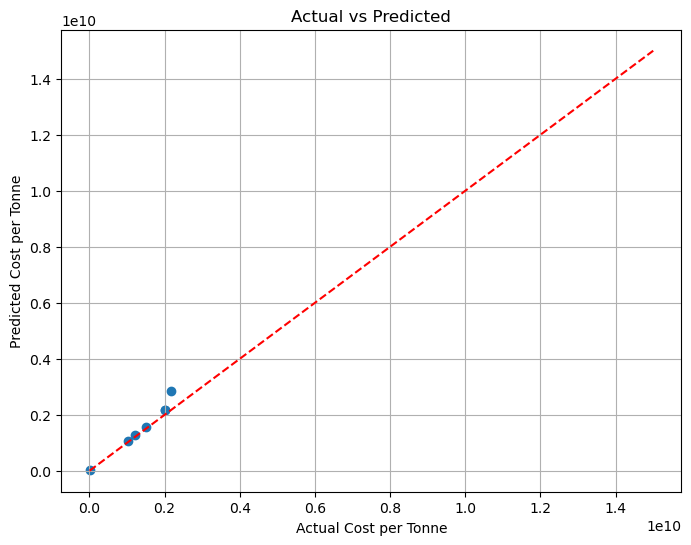

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, prediction)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'r--')
plt.xlabel('Actual Cost per Tonne')
plt.ylabel('Predicted Cost per Tonne')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()